## **Recognize an Animal in an Image**

**Objective** - Build a deep learning model that helps you recognize the animal in images.

Animals to be recognized - mucca (cow) and pecora (sheep)

## **Mucca(Cow)**

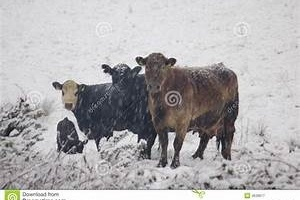



## **Pecora(Sheep)**

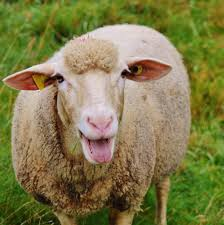

 **Evaluation Criteria - Accuracy**

Calculated as 

Accuracy = (TP+TN)/(TP+TN+FP+FN) 

where   TP = True Positive, 

TN = True Negative,

 FP = False Positive, 
 
 FN = False Negative .

 

## **Stride :**
*   Loading Data
       1. Collecting from github
       2. Converting into image pixels 

*   Pre-processing
       1. Image Scaling
       2. Normalizing image 
       3. Data Augmentation

*   Building a Multi-Layer Perceptron
       1. Simple Neural network
       2. Neural Network with hidden layer

*   Loss Function and Optimizer
*   Training the model
       1. MLP model
       2. Convolutional neural network model
*   Tensorboard
*   Optimization Techniques
      1. Transfer Learning - VGG-19 model
      2. Hyperparameter tuning
*   Prediction



**About the Data**

The training dataset consists of 1200 medium quality animal images belonging to 2 categories: mucca (cow) and pecora (sheep). All the images have been collected from "google images" and have been checked by humans. There is some erroneous data to simulate real conditions (eg. images taken by users of your app).

The testing dataset consists of 400 images.
Dataset Link: https://github.com/dphi-official/Datasets/tree/master/animal_data

# **1. Loading Data**
For making a deep learning model we first need to have data to work on.

**Collecting from github**

###### The first step is to download the repository 'Datasets' to the colab files. We can achieve this by executing the below code.

In [6]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 32.00 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


######We need to extract the two zip files 'test_beg.zip' which contains testing images and 'train_beg.zip' contains images for training the model.

In [7]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

Archive:  /content/Datasets/animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflat

Loading Libraries

Let's import the required libraries. Not importing all the libraries in one go instead we will be importing whenever we require one.

In [8]:
# import the basic libraries
import pandas as pd
import numpy as np

**Loading the Train Data**

We are given training data in two different files/folders:

1. **train_beg** folder contains all the images to be used for training the model. This can be found under the files section of Colab. 
2. Training_set_animals.csv - contains all the image ids from train_beg folder with their respective labels. This can be found in the "**files --> Datasets --> animal_data --> Training_set_animals.csv**"

In [9]:
# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()    # display first five rows from train_labels dataframe

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


We can see above the image id with their corresponding labels

Let's get all the training images paths because all we have is the image paths where the image is located. We will also need to get all the image ids (i.e. the image filename) for example, Image_1.jpg

In [10]:
image_paths = ['/content/train_beg/' + fname for fname in train_labels['filename']]
image_paths    # will get list of list of image id and image path

"""
The reason behind using the filename from train_labels is that 
- it will help us to get all the images whose labels we already have in train_labels.
- It will also help to maintain the order of the images. If we notice the images ids in train_labels, they are
in some specific order, this will help us load all the images location in the list in the same order.
"""

'\nThe reason behind using the filename from train_labels is that \n- it will help us to get all the images whose labels we already have in train_labels.\n- It will also help to maintain the order of the images. If we notice the images ids in train_labels, they are\nin some specific order, this will help us load all the images location in the list in the same order.\n'

We have all the labels for the images in 'train_labels' and all the filepaths in 'image_paths'. So let's check if the number of labels we have is same as the number of images. The below code will help you to check this.

In [11]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_labels) == len(image_paths):
    print('Number of labels i.e. ', len(train_labels), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


Now let's map all the image paths to their respective ids and labels in dataframe.

In [12]:
train_data = pd.DataFrame({'filename': train_labels['filename'], 'filepath': image_paths, 'animal_type': train_labels['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


We can notice above that the filename: 'Image_1.jpg' is present in the respective filepath: '/content/train_beg/Image_1.jpg'. This indicates all are in the same order. We can also try and check for other images randomly if filepath and filname are correct or not.

In [13]:
train_data.animal_type.unique()

array(['mucca', 'pecora'], dtype=object)

In [14]:
train_data.animal_type.value_counts()

mucca     600
pecora    600
Name: animal_type, dtype: int64

We can see that our dataset is balanced.

In [15]:
print(train_data.iloc[467])

filename                          Image_468.jpg
filepath       /content/train_beg/Image_468.jpg
animal_type                               mucca
Name: 467, dtype: object


# **Loading Test data**
Now we will do same for test data as we do for train data

In [16]:
# Get the csv file given 'Testing_set_animals.csv'
# accessing the given csv file
test_csv = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv", header=None)
test_csv.head()   # this file contains file name

,0
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [17]:
# Get image paths
test_image_paths = [[fname, '/content/test_beg/' + fname[:-4] + '.jpg'] for fname in test_csv[0]]
test_image_paths

[['Image_1.jpg', '/content/test_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/test_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/test_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/test_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/test_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/test_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/test_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/test_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/test_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/test_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/test_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/test_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/test_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/test_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/test_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/test_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/test_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/test_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/test_beg/Image_19.jpg'],
 ['Image_20

In [18]:
# Confirm if number of images is same as number of labels given
if len(test_csv) == len(test_image_paths):
    print('Number of labels i.e. ', len(test_csv), 'matches the number of filenames i.e. ', len(test_image_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


In [19]:
test_images = pd.DataFrame(test_image_paths)
test_images.columns =['filename', 'file']
test_images

,filename,file
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg
...,...,...
395,Image_396.jpg,/content/test_beg/Image_396.jpg
396,Image_397.jpg,/content/test_beg/Image_397.jpg
397,Image_398.jpg,/content/test_beg/Image_398.jpg
398,Image_399.jpg,/content/test_beg/Image_399.jpg


Now let us watch some images from the train and test data

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

img = cv2.imread(train_data.loc[0,'filepath'],1) 
cv2_imshow(img)
print(img.shape)
print(train_data.loc[0,'animal_type']) # label associated with it

In [ ]:
img = cv2.imread(train_data.loc[1191,'filepath'],1) 
cv2_imshow(img)
print(img.shape)
print(train_data.loc[1191,'animal_type']) # label associated with it

# **Converting into Image's Pixel Values**

We need to convert these images to their pixel values so that we can apply ML/DL Models. We can achieve this using cv2 (OpenCV) library. 

## Loading Image's Pixel Values

> 


OpenCV's imread method helps in reading an image and getting its pixel values. We just need to provide the path of each image inside imread().

Finally, store the image as well as its label inside data.

**Converting train data**

In [22]:
traindata = []    # initialize a list to store, each image's pixel values 
trainlabels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
  image_arr = cv2.imread(train_data['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  traindata.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    trainlabels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    trainlabels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again



In [23]:
#converting list into numpy array
traindata=np.array(traindata)
trainlabels=np.array(trainlabels)

In [24]:
trainlabels

array([0, 0, 0, ..., 1, 1, 1])

**Converting Test data**

Our test data do not have labels associated with it. 

In [25]:
import cv2
testdata = []
for i in range(len(test_images)):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  img_array = cv2.imread (test_images.loc[i,'file'],1) 
  testdata.append([img_array])

In [26]:
#Converting into numpy array
testdata = np.array(testdata)

In [27]:
testdata=testdata.reshape(400,200,300,3)
testdata.shape

(400, 200, 300, 3)

# **2. Pre-processing of Images**

Before feeding our data to the deep-learning model, we first need to pre-process our data to check anomalies and making it suitable to fit in model.

There are several steps involved in it 
Lets do it one by one.


### Display pixel values of image
Firstly let's us get the insight of images by knowing their pixel values and range of pixels


In [28]:
traindata[0]

array([[[207, 205, 205],
        [207, 205, 205],
        [207, 205, 205],
        ...,
        [204, 203, 205],
        [204, 203, 205],
        [205, 204, 206]],

       [[205, 203, 203],
        [205, 203, 203],
        [206, 204, 204],
        ...,
        [203, 202, 204],
        [205, 204, 206],
        [206, 205, 207]],

       [[207, 205, 205],
        [206, 204, 204],
        [205, 203, 203],
        ...,
        [204, 203, 205],
        [206, 205, 207],
        [208, 207, 209]],

       ...,

       [[246, 252, 247],
        [245, 255, 251],
        [232, 253, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[241, 248, 243],
        [241, 255, 249],
        [230, 253, 249],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[243, 250, 245],
        [243, 255, 251],
        [232, 255, 251],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [29]:
traindata[0].shape

(200, 300, 3)

This is simplest form of train data in which we can gain the information that pixels range from 0-255 and size of image is 200,300,3 where 3 is no. channels

Now We are twisting images by applying operations

In [ ]:
# Converting Coloured Image to Gray Image
image = cv2.imread('/content/train_beg/Image_1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
cv2_imshow(image)
cv2_imshow(gray)

Resizing The image to 300 300

In [ ]:
resized_image = cv2.resize(image, (300,300))
cv2_imshow(resized_image)

Resizing the image to 64,64

In [32]:
img=cv2.resize(traindata[0],(64,64))

In [ ]:
cv2_imshow(img)

Now we'll see 10 images of mucca and pecora

In [34]:
import matplotlib.pyplot as plt # for visualization

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
c = 0
for i in range(10):
    idx = i // 5
    idy = i % 5 
    img=cv2.imread(train_data.loc[i,'filepath'],1) 
    ax[idx, idy].imshow(img)
    ax[idx, idy].set_title(train_data.loc[i,'animal_type'])

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
c = 0
for i in range(10):
    idx = i // 5
    idy = i % 5 
    img=cv2.imread(train_data.loc[i+1190,'filepath'],1) 
    ax[idx, idy].imshow(img)
    ax[idx, idy].set_title(train_data.loc[i+1190,'animal_type'])

## **Image Scaling**
Image Scaling refers to resizing of a digital image

As we see some different images of mucca and pecora in our dataset.
So we will be resizing our image to 64 * 64 * 3 from 200 * 300 * 3. For fitting into the model

In [37]:
traindata_resized=[]
testdata_resized=[]
for i in range(len(traindata)):
  img=cv2.resize(traindata[i],(64,64))
  traindata_resized.append(img)

for i in range(len(testdata)):
  img=cv2.resize(testdata[i],(64,64))
  testdata_resized.append(img)

In [38]:
traindata_resized=np.array(traindata_resized)
testdata_resized=np.array(testdata_resized)
print('\nTrain_images.shape: {}, of {}'.format(traindata_resized.shape, traindata_resized.dtype))
print('\nTest_images_channge.shape: {}, of {}'.format(testdata_resized.shape, testdata_resized.dtype))


Train_images.shape: (1200, 64, 64, 3), of uint8

Test_images_channge.shape: (400, 64, 64, 3), of uint8


# **Normalizing Image**

 we are going to apply image scaling in it. 
Firstly
Converting all image pixels of 0-255 to 0-1 by dividing 255.

In [39]:
traindata_resized.shape

(1200, 64, 64, 3)

In [40]:
testdata_resized.shape

(400, 64, 64, 3)

In [41]:
traindata_scaled=traindata_resized/255.0

We will be doing all operations simultaneously on test data as well because both must have same structure 

In [42]:
testdata_scaled=testdata_resized/255.0

In [43]:
traindata_scaled[0][0][0]

array([0.80784314, 0.8       , 0.8       ])

As we can see our data is ranged to 0 to 1.

#**Data Augmentation**

Data augmentation is a strategy that enables us to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

We will be doing data augmentation by the ImageDatagenerator of preprocessing library of tf.keras

In [44]:
import tensorflow as tf #importing tensorflow

In [45]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    vertical_flip=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    fill_mode='nearest',
    height_shift_range=0.2,
    horizontal_flip=True)

# **Converting data into gray image**
We will have a dataset of gray images as well and will feed both images in our dataset.

In [46]:
traindata_gray=[]
testdata_gray=[]

for i in traindata_resized:
  gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  traindata_gray.append(gray)

for i in testdata_resized:
  gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  testdata_gray.append(gray)

traindata_gray=np.array(traindata_gray)
testdata_gray=np.array(testdata_gray) 

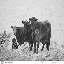

In [47]:
gray = cv2.cvtColor(traindata_resized[0], cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [48]:
traindata_gray=traindata_gray/255.0
testdata_gray=testdata_gray/255.0

In [49]:
traindata_gray.shape

(1200, 64, 64)

In [50]:
testdata_gray.shape

(400, 64, 64)

Flatten the data for feeding in MLP

We simply convert a 2 dimensional data (i.e. one image data) to 1 dimensional.

In [51]:
traindata_gray_flattened = traindata_gray.reshape(len(traindata_gray), 64*64)    # converting our 2D array representin an image to one dimensional
testdata_gray_flattened = testdata_gray.reshape(len(testdata_gray), 64*64)

In [52]:
traindata_gray_flattened.shape

(1200, 4096)

##**Training and Testing split**
We will be splitting our train data into train and test using sklearn's train test split. 
As we already have a test set but we don't have it labels so we are spliting it to get the test data with labels for checking the performance of model.

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(traindata_gray_flattened,trainlabels,test_size=0.3, random_state = 42)

In [54]:
x_train.shape

(840, 4096)

In [55]:
y_train.shape

(840,)

#**3. Building Multilayer Perceptron Model**

Very simple neural network with no hidden layers

   Steps Involved -
1. Define the model
2. Compile Model
3. Fit data into Model

In [93]:
# Defining the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(4096,), activation='sigmoid')     # The input shape is 4096. 
])


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4097      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


**Compile model**

In [94]:
# Compiling the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

adam is an optimization algorithm 

binary_crossentropy is a loss function use for binary classification

The metrics used to evaluate the model is accuracy. Accuracy calculates how often the predictions calculated by the model are correct.

**Fit model**

In [95]:
# Fitting the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
27/27 [==============================] - 0s 2ms/step - loss: 0.7517 - accuracy: 0.5060
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5964
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6048
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5940
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6298
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6643
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6619
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6774
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.6952
Epoch 10/10
27/27 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.6940


In [60]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6417


[0.6480745673179626, 0.6416666507720947]

We have trained a simple neural netowork with gray images and in 1 dimensional. Now let's check how validation set works and it's graph

In [61]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(x_train, y_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=20,              
                    verbose=1)              

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.6087 - accuracy: 0.6746 - val_loss: 0.5980 - val_accuracy: 0.6667
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.6746 - val_loss: 0.6583 - val_accuracy: 0.6071
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.6521 - val_loss: 0.5827 - val_accuracy: 0.7143
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.7130 - val_loss: 0.6034 - val_accuracy: 0.6786
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.6825 - val_loss: 0.6417 - val_accuracy: 0.5833
Epoch 00005: early stopping


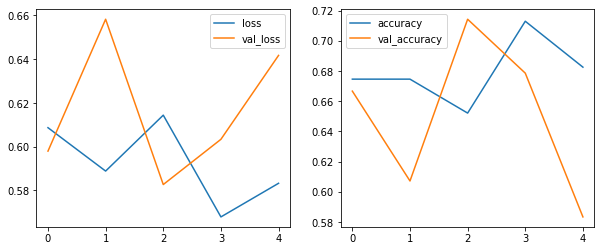

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

Evaluating on Test data

In [63]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.6222


[0.6308771967887878, 0.6222222447395325]

In [64]:
predictions = model.predict(x_test)
prediction_labels = np.argmax(predictions, axis=1)

In [65]:
class_names=['mucca','pecora']

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(y_test, prediction_labels), index=class_names, columns=class_names)

              precision    recall  f1-score   support

       mucca       0.51      1.00      0.68       185
      pecora       0.00      0.00      0.00       175

    accuracy                           0.51       360
   macro avg       0.26      0.50      0.34       360
weighted avg       0.26      0.51      0.35       360



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,mucca,pecora
mucca,185,0
pecora,175,0


We can see the full report of our model

# **Building Neural Network Model Using hidden layer**

In [89]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(4096,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               409700    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 430,001
Trainable params: 430,001
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=42,
                    #callbacks=[es_callback], 
                    validation_split=0.1, epochs=20,              
                    verbose=1)    

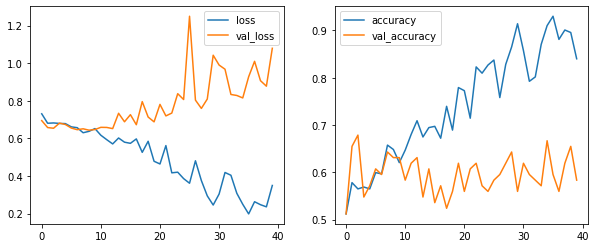

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

We can clearly see that our validation accuracy is very low as compared to training accuracy 

# **Building the Convolutional Neural Network**

In [71]:
x_train,x_test,y_train,y_test=train_test_split(traindata_gray,trainlabels,test_size=0.3, random_state = 42)

In [72]:
x_train.shape

(840, 64, 64)

In [73]:
x_train=x_train.reshape(840,64,64,1)

In [74]:
from keras.layers import BatchNormalization

In [75]:
# define input shape
INPUT_SHAPE = (64, 64,1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)             

In [76]:
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(x_train, y_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
24/24 [==============================] - 3s 135ms/step - loss: 2.1127 - accuracy: 0.5384 - val_loss: 0.7224 - val_accuracy: 0.5119
Epoch 2/100
24/24 [==============================] - 3s 129ms/step - loss: 1.1147 - accuracy: 0.6019 - val_loss: 2.7101 - val_accuracy: 0.5119
Epoch 3/100
24/24 [==============================] - 3s 130ms/step - loss: 0.7864 - accuracy: 0.6680 - val_loss: 3.2014 - val_accuracy: 0.5119
Epoch 00003: early stopping


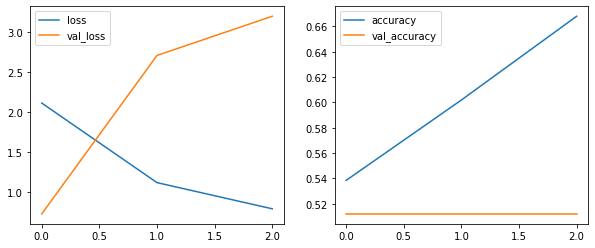

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

We can see we are not heading anywhere even in convolutional neural network.
So let's use the data augmentation that we created earlier

In [78]:
data_aug.fit(x_train)

In [79]:
history = model.fit(data_aug.flow(x_train, y_train,
                    batch_size=32), 
                    epochs=30,
                    verbose=1)

Epoch 1/30
27/27 [==============================] - 4s 139ms/step - loss: 1.0283 - accuracy: 0.5226
Epoch 2/30
27/27 [==============================] - 4s 138ms/step - loss: 0.9514 - accuracy: 0.5464
Epoch 3/30
27/27 [==============================] - 4s 139ms/step - loss: 0.8518 - accuracy: 0.5548
Epoch 4/30
27/27 [==============================] - 4s 138ms/step - loss: 0.8386 - accuracy: 0.5333
Epoch 5/30
27/27 [==============================] - 4s 139ms/step - loss: 0.7949 - accuracy: 0.5298
Epoch 6/30
27/27 [==============================] - 4s 138ms/step - loss: 0.7547 - accuracy: 0.5417
Epoch 7/30
27/27 [==============================] - 6s 222ms/step - loss: 0.7399 - accuracy: 0.4929
Epoch 8/30
27/27 [==============================] - 4s 165ms/step - loss: 0.7033 - accuracy: 0.5190
Epoch 9/30
27/27 [==============================] - 4s 144ms/step - loss: 0.7211 - accuracy: 0.5226
Epoch 10/30
27/27 [==============================] - 4s 142ms/step - loss: 0.6925 - accuracy: 0.5488

Even after tweaking the hyper-parameters we can see that there is no-progress in our model

# **Transfer Learning**
So we will using VGG-19 model.
 

As VGG-19 model only uses 3 channel images so we will be feeding that into it.

In [98]:
x_train,x_test,y_train,y_test=train_test_split(traindata_scaled,trainlabels,test_size=0.3, random_state = 42)

In [99]:
INPUT_SHAPE = (64, 64,3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [100]:

for layer in vgg_layers.layers:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2711ff1208> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2712692ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2711fb5470> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2711fb5828> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2711ff87f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2711f988d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2711f85470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2711f85358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2712202dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2711fb02b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2711f90f28> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [101]:
#define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-6), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               524544    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)              

In [103]:
history = model.fit(data_aug.flow(x_train, y_train, 
                    batch_size=32), 
                    epochs=10,
                    verbose=1)

Epoch 1/10
27/27 [==============================] - 43s 2s/step - loss: 1.1118 - accuracy: 0.5060
Epoch 2/10
27/27 [==============================] - 43s 2s/step - loss: 1.0743 - accuracy: 0.5048
Epoch 3/10
27/27 [==============================] - 46s 2s/step - loss: 1.0926 - accuracy: 0.5202
Epoch 4/10
27/27 [==============================] - 43s 2s/step - loss: 1.0539 - accuracy: 0.5417
Epoch 5/10
27/27 [==============================] - 44s 2s/step - loss: 1.1108 - accuracy: 0.5143
Epoch 6/10
27/27 [==============================] - 43s 2s/step - loss: 1.0211 - accuracy: 0.5357
Epoch 7/10
27/27 [==============================] - 43s 2s/step - loss: 1.0578 - accuracy: 0.5381
Epoch 8/10
27/27 [==============================] - 43s 2s/step - loss: 1.0625 - accuracy: 0.5226
Epoch 9/10
27/27 [==============================] - 43s 2s/step - loss: 1.0828 - accuracy: 0.5369
Epoch 10/10
27/27 [==============================] - 43s 2s/step - loss: 1.0654 - accuracy: 0.5405


# **Prediction**

We will be doing prediction for the test dataset

In [104]:
predictions = model.predict(testdata_scaled)
predictions[:5]

array([[0.7824342 , 0.21756575],
       [0.38900933, 0.6109907 ],
       [0.85596365, 0.14403637],
       [0.52845854, 0.47154146],
       [0.5772128 , 0.4227872 ]], dtype=float32)

In [105]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([0, 1, 0, 0, 0])

In [106]:
len(prediction_labels)

400

In [107]:
for i in prediction_labels:
  if i==1:
    print("'"+'mucca'+"'",end=",")
  if i==0:  
   print("'"+'pecora'+"'",end=",")

'pecora','mucca','pecora','pecora','pecora','pecora','mucca','pecora','pecora','pecora','mucca','pecora','mucca','pecora','mucca','mucca','mucca','mucca','pecora','pecora','pecora','pecora','pecora','mucca','mucca','pecora','pecora','mucca','mucca','pecora','pecora','mucca','pecora','mucca','pecora','mucca','mucca','mucca','mucca','pecora','pecora','pecora','mucca','mucca','mucca','mucca','mucca','pecora','pecora','mucca','pecora','mucca','pecora','pecora','mucca','pecora','pecora','pecora','mucca','mucca','pecora','pecora','pecora','pecora','pecora','mucca','mucca','mucca','mucca','mucca','mucca','pecora','pecora','pecora','pecora','pecora','mucca','pecora','mucca','mucca','pecora','pecora','pecora','pecora','pecora','pecora','mucca','pecora','pecora','mucca','mucca','mucca','pecora','pecora','pecora','pecora','pecora','pecora','pecora','pecora','mucca','pecora','pecora','mucca','mucca','pecora','pecora','pecora','mucca','mucca','mucca','mucca','mucca','mucca','mucca','pecora','mucca'